In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('..')  # Adjust the path to the parent directory of 'source' if necessary
from source.preprocessing import DataPreprocessor
from source.studentGrouping import StudentGrouping
import networkx as nx

In [2]:
filePATH = "../data/raw/personalized_learning_dataset.csv"
df = pd.read_csv(filePATH)

In [3]:
import os
print("Current working directory:", os.getcwd())
preprocessor = DataPreprocessor(df=df)
df = preprocessor.encodeCategorical()

Current working directory: d:\EvolveEd\notebooks


In [4]:
grouping = StudentGrouping(df)

In [5]:
AgglomerativeLabels = grouping.clusterStudents(algorithm = "Agglomerative", n_clusters = 4)
KMeansLabels = grouping.clusterStudents(algorithm = "KMeans", n_clusters = 4, random_state = 42)
DBSCANLabels = grouping.clusterStudents(algorithm = "DBSCAN", eps = 1.5, min_samples = 5) 

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcaResult = pca.fit_transform(df.drop(columns=['Student_ID']))

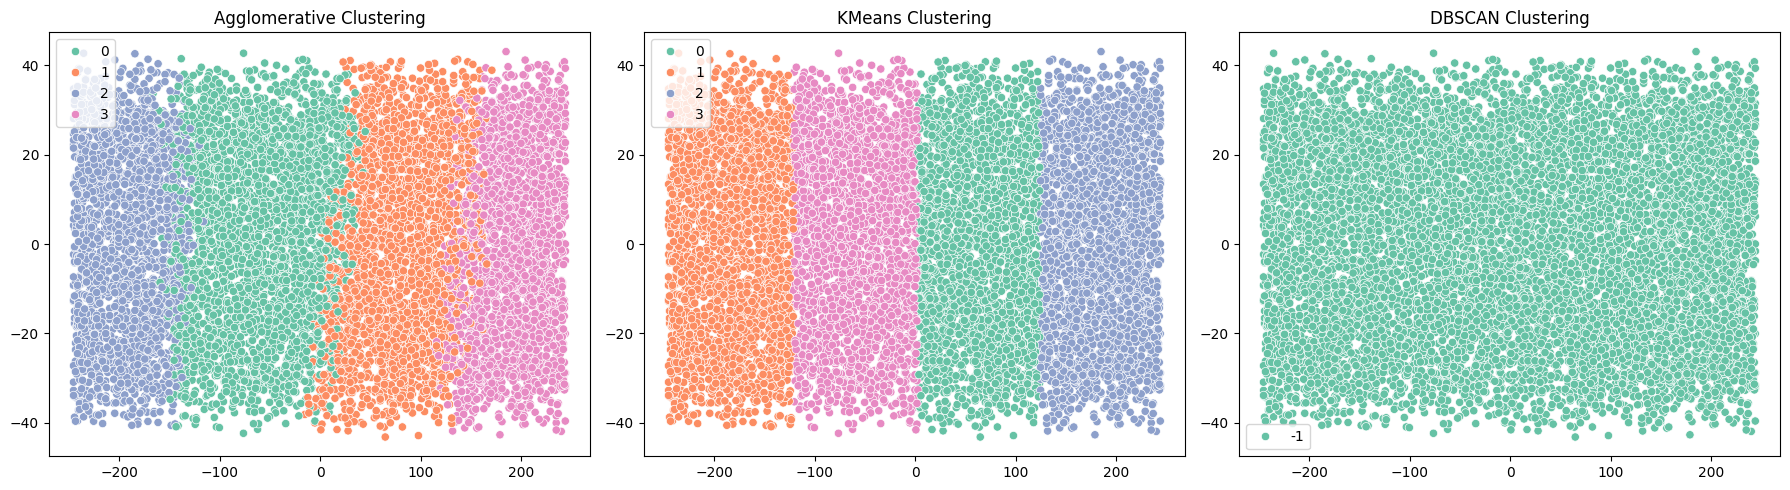

In [7]:
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
algorithms = ['Agglomerative', 'KMeans', 'DBSCAN']
labels_list = [AgglomerativeLabels, KMeansLabels, DBSCANLabels]

for ax, title, labels in zip(axes, algorithms, labels_list):
    sns.scatterplot(x=pcaResult[:, 0], y=pcaResult[:, 1], hue=labels, palette='Set2', ax=ax)
    ax.set_title(f'{title} Clustering')

plt.tight_layout()
plt.show()

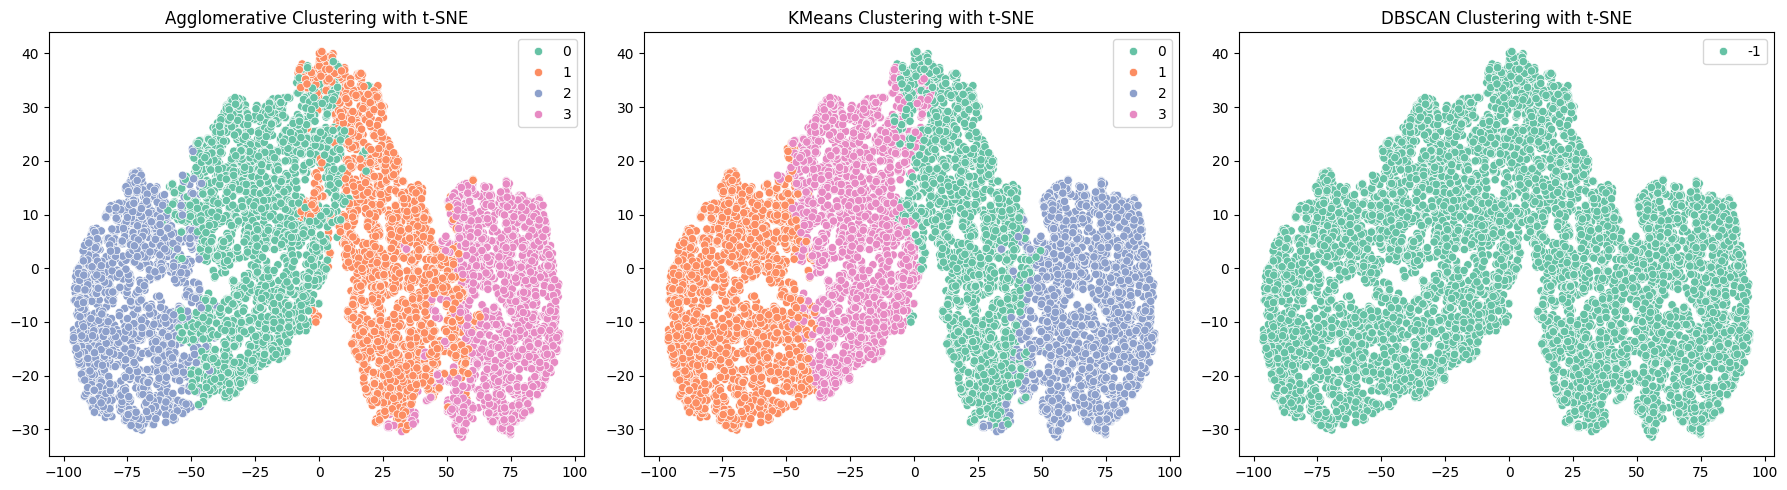

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=50, max_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(df.drop(columns=['Student_ID']))
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, title, labels in zip(axes, algorithms, labels_list):
    sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=labels, palette='Set2', ax=ax)
    ax.set_title(f'{title} Clustering with t-SNE')

plt.tight_layout()
plt.show()

In [9]:
df['Avg_Quiz_Score_Per_Attempt'] = df['Quiz_Scores'] / df['Quiz_Attempts'].replace(0, 1)
df['Engagement_Score'] = 0.4 * df['Time_Spent_on_Videos'] + 0.3 * df['Forum_Participation'] + 0.3 * df['Assignment_Completion_Rate']
df['Video_Efficiency'] = df['Quiz_Scores'] / df['Time_Spent_on_Videos'].replace(0, 1)
df['Consistency_Index'] = abs(df['Quiz_Scores'] - df['Final_Exam_Score'])  # As a proxy

In [10]:
cluster_configs = {
    "Engagement": ['Time_Spent_on_Videos', 'Forum_Participation', 'Assignment_Completion_Rate', 'Engagement_Score'],
    "Performance": ['Quiz_Scores', 'Quiz_Attempts', 'Final_Exam_Score', 'Avg_Quiz_Score_Per_Attempt'],
    "LearningStyle_Behavior": ['Learning_Style', 'Time_Spent_on_Videos', 'Dropout_Likelihood', 'Feedback_Score'],
    "Dropout_Risk": ['Dropout_Likelihood', 'Assignment_Completion_Rate', 'Quiz_Attempts', 'Feedback_Score', 'Consistency_Index']
}

In [15]:
def clusterAndPlotAllModels(df, features, nClusters=4, eps=1.5, minSamples=5):
    X = df[features]

    grouping = StudentGrouping(X)

    AgglomerativeLabels = grouping.clusterStudents(algorithm = "Agglomerative", n_clusters = nClusters)
    KMeansLabels = grouping.clusterStudents(algorithm = "KMeans", n_clusters = nClusters, random_state = 42)
    
    pca = PCA(n_components=2)
    ppcaResult = pca.fit_transform(X)

    # Plot results
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    sns.scatterplot(x=pcaResult[:, 0], y=pcaResult[:, 1], hue=KMeansLabels, palette='Set2', ax=axs[0], s=20)
    axs[0].set_title("KMeans Clustering")

    sns.scatterplot(x=pcaResult[:, 0], y=pcaResult[:, 1], hue=AgglomerativeLabels, palette='Set2', ax=axs[1], s=20)
    axs[1].set_title("Agglomerative Clustering")

    plt.tight_layout()
    plt.show()

Clustering for Engagement with features: ['Time_Spent_on_Videos', 'Forum_Participation', 'Assignment_Completion_Rate', 'Engagement_Score']


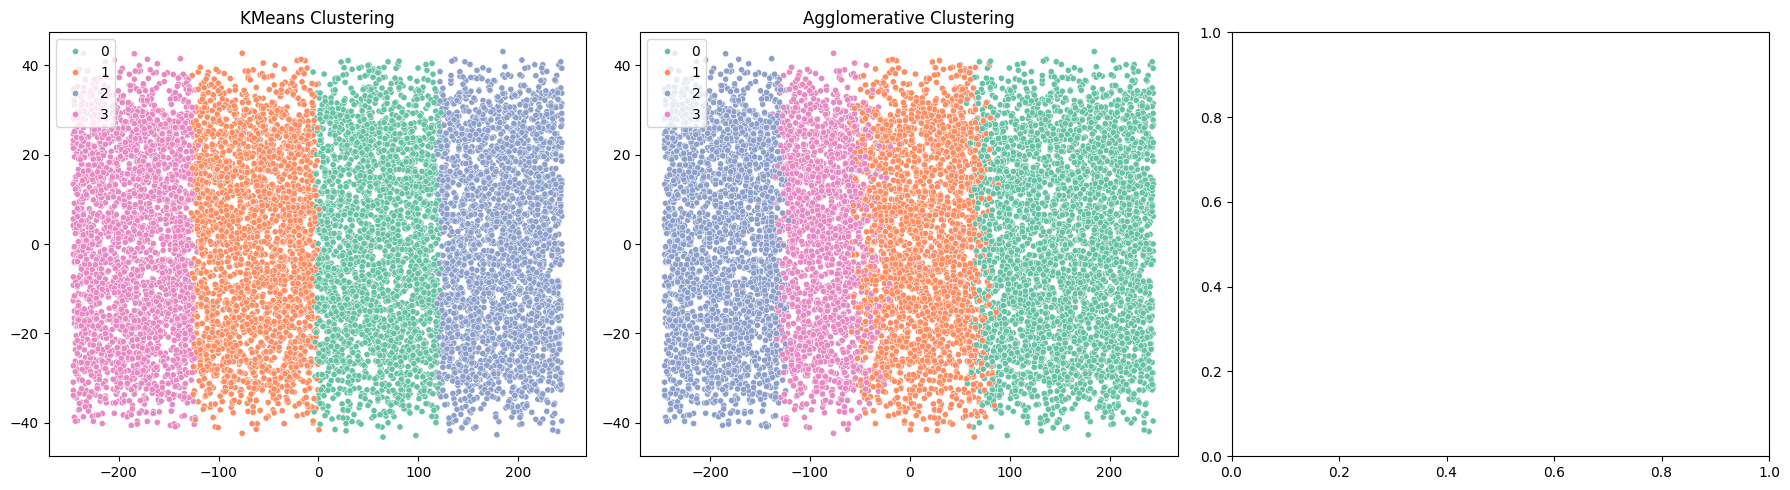

Clustering for Performance with features: ['Quiz_Scores', 'Quiz_Attempts', 'Final_Exam_Score', 'Avg_Quiz_Score_Per_Attempt']


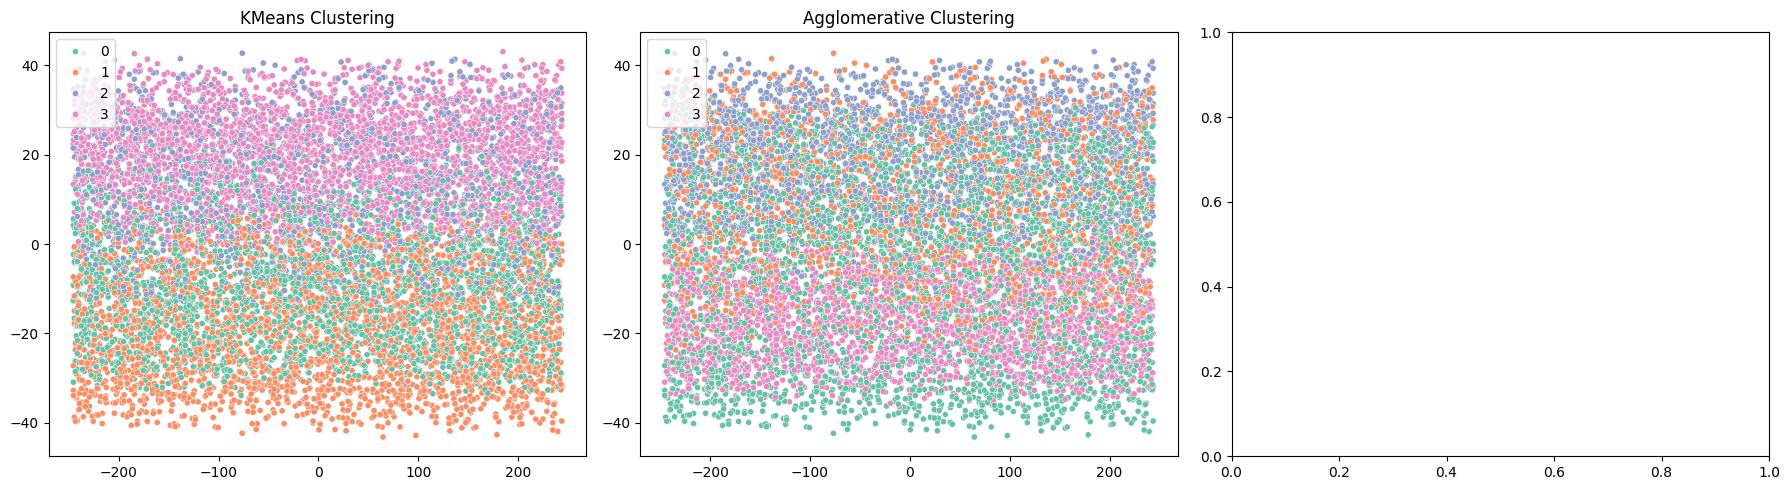

Clustering for LearningStyle_Behavior with features: ['Learning_Style', 'Time_Spent_on_Videos', 'Dropout_Likelihood', 'Feedback_Score']


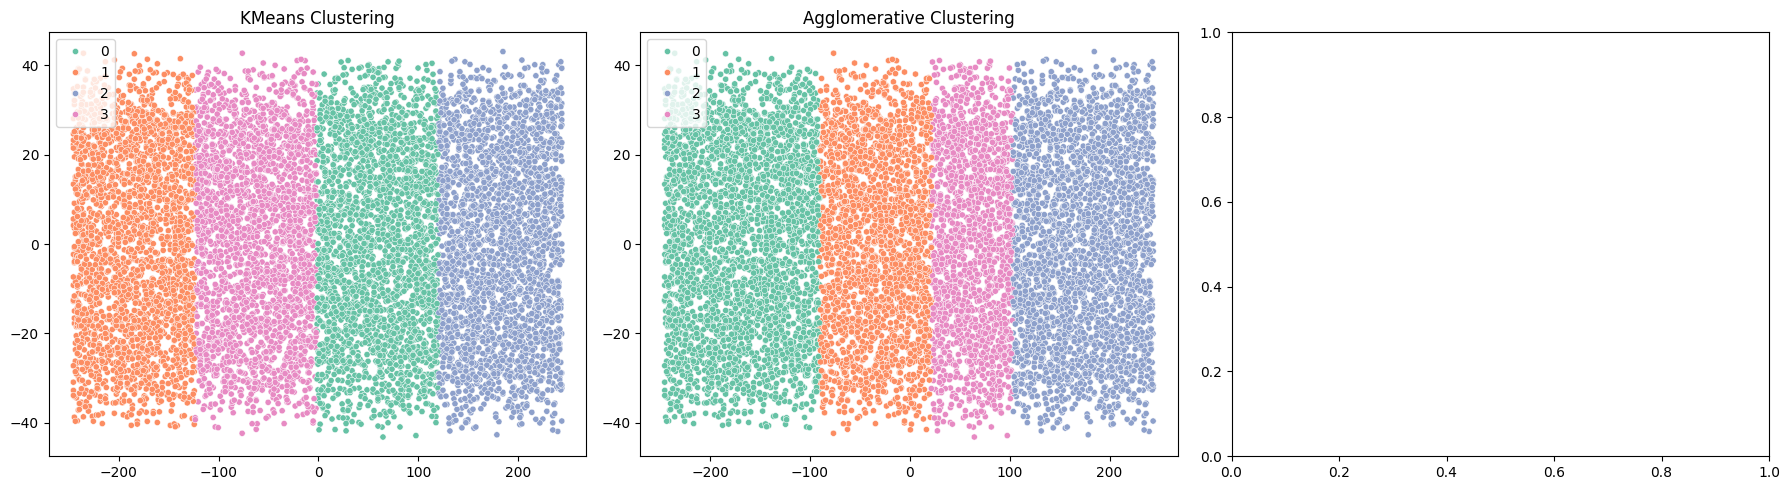

Clustering for Dropout_Risk with features: ['Dropout_Likelihood', 'Assignment_Completion_Rate', 'Quiz_Attempts', 'Feedback_Score', 'Consistency_Index']


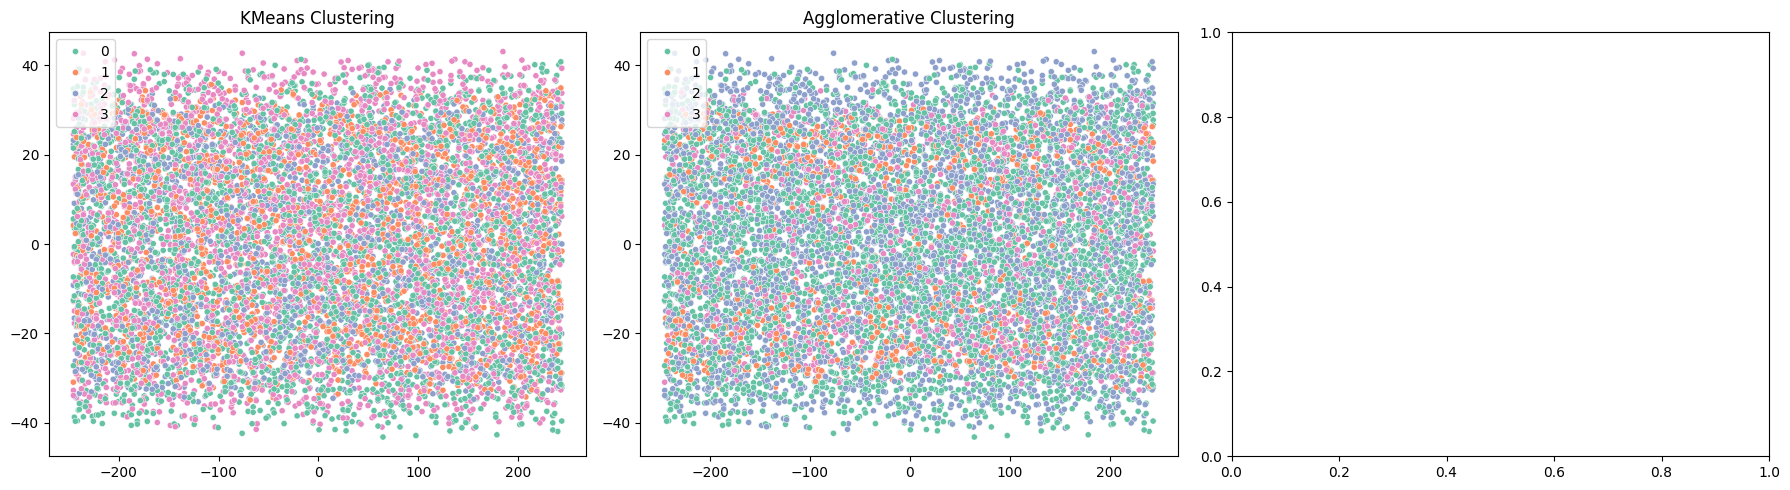

In [16]:
for cluster_name, features in cluster_configs.items():
    print(f"Clustering for {cluster_name} with features: {features}")
    clusterAndPlotAllModels(df, features)